# Sistem Rekomendasi K-Drama - Khoirotun Hisan

## Project Overview
Proyek ini bertujuan untuk membangun sistem rekomendasi drama Korea (K-Drama) menggunakan pendekatan Content-Based Filtering, yang merekomendasikan drama berdasarkan kemiripan konten (genre).

Dengan meningkatnya minat global terhadap K-Drama, pengguna membutuhkan cara yang lebih efisien untuk menemukan tontonan yang relevan dengan selera mereka. Proyek ini diharapkan dapat membantu pengguna mendapatkan rekomendasi drama berdasarkan genre yang mereka sukai sebelumnya.

## Business Understanding
- **Problem Statement**: Banyak penonton K-Drama merasa kesulitan menemukan drama baru yang sesuai dengan selera mereka karena terlalu banyak pilihan.

- **Goals**: Membangun sistem rekomendasi yang dapat memberikan daftar drama Korea yang mirip berdasarkan genre dari drama yang disukai pengguna.

## Data Understanding

Dataset yang digunakan berjudul **Top 250 Korean Dramas (KDrama)**, yang dapat diakses melalui Kaggle:

🔗 [https://www.kaggle.com/datasets/ahbab911/top-250-korean-dramas-kdrama-dataset](https://www.kaggle.com/datasets/ahbab911/top-250-korean-dramas-kdrama-dataset)

### Informasi Umum:

* Jumlah data: 250 drama
* Fitur utama:

  * `Title`: Judul drama
  * `Genre`: Genre utama (dipisahkan koma)
  * `Rating`: Nilai rating IMDb
  * `Year`: Tahun rilis
  * `Synopsis`: Sinopsis drama

### Visualisasi:

Distribusi rating drama menunjukkan bahwa sebagian besar drama berada pada kisaran rating 8.0 – 9.5, yang mencerminkan kualitas tinggi dari drama yang terkurasi.

In [1]:
import pandas as pd
df = pd.read_csv("/content/kdrama.csv")
df.head()

,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Duration,Content Rating,Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank
0,Move to Heaven,"May 14, 2021",2021,Netflix,Friday,10,52 min.,18+ Restricted (violence & profanity),9.2,Geu Roo is a young autistic man. He works for ...,"Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...",Kim Sung Ho,Yoon Ji Ryun,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Page One Film, Number Three Pictures",#1
1,Flower of Evil,"Jul 29, 2020 - Sep 23, 2020",2020,tvN,"Wednesday, Thursday",16,1 hr. 10 min.,15+ - Teens 15 or older,9.1,Although Baek Hee Sung is hiding a dark secret...,"Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...","Kim Chul Gyu, Yoon Jong Ho",Yoo Jung Hee,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...",Monster Union,#2
2,Hospital Playlist,"Mar 12, 2020 - May 28, 2020",2020,"Netflix, tvN",Thursday,12,1 hr. 30 min.,15+ - Teens 15 or older,9.1,The stories of people going through their days...,"Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",#3
3,Hospital Playlist 2,"Jun 17, 2021 - Sep 16, 2021",2021,"Netflix, tvN",Thursday,12,1 hr. 40 min.,15+ - Teens 15 or older,9.1,Everyday is extraordinary for five doctors and...,"Friendship, Romance, Life, Medical","Workplace, Strong Friendship, Best Friends, Mu...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",#4
4,My Mister,"Mar 21, 2018 - May 17, 2018",2018,tvN,"Wednesday, Thursday",16,1 hr. 17 min.,15+ - Teens 15 or older,9.1,Park Dong Hoon is a middle-aged engineer who i...,"Psychological, Life, Drama, Family","Age Gap, Nice Male Lead, Strong Female Lead, H...","Kim Won Suk, Kim Sang Woo",Park Hae Young,"Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...",Chorokbaem Media,#5


In [2]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  250 non-null    object 
 1   Aired Date            250 non-null    object 
 2   Year of release       250 non-null    int64  
 3   Original Network      250 non-null    object 
 4   Aired On              250 non-null    object 
 5   Number of Episodes    250 non-null    int64  
 6   Duration              250 non-null    object 
 7   Content Rating        245 non-null    object 
 8   Rating                250 non-null    float64
 9   Synopsis              250 non-null    object 
 10  Genre                 250 non-null    object 
 11  Tags                  250 non-null    object 
 12  Director              249 non-null    object 
 13  Screenwriter          249 non-null    object 
 14  Cast                  250 non-null    object 
 15  Production companies  2

,0
Name,0
Aired Date,0
Year of release,0
Original Network,0
Aired On,0
Number of Episodes,0
Duration,0
Content Rating,5
Rating,0
Synopsis,0


## Univariate Exploratory Data Analysis

Pada tahap ini kita menganalisis setiap fitur secara individu. Fokus utama ada pada fitur `Rating`, `Genre`, dan `Year of release` karena akan membantu dalam sistem rekomendasi.

Kita juga akan visualisasikan distribusi rating dan jumlah drama per tahun rilis.

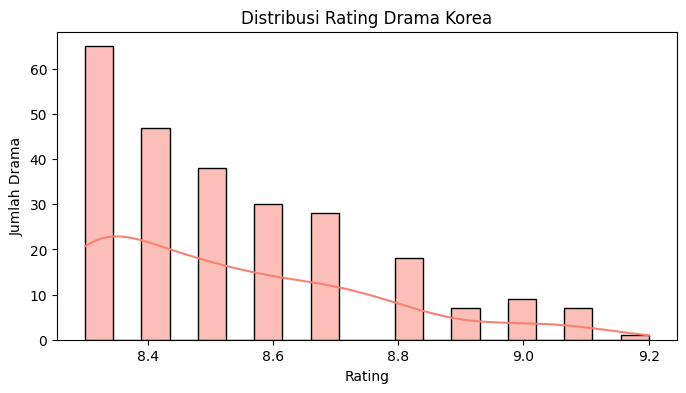

<ipython-input-3-683376b2d0be>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year of release', data=df, palette='Blues_r')


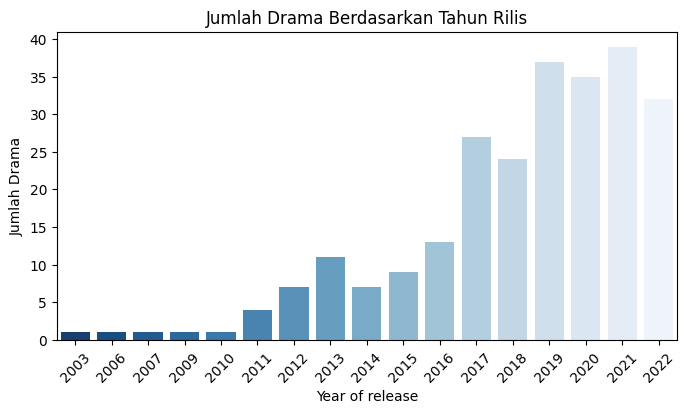

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribusi rating
plt.figure(figsize=(8,4))
sns.histplot(df['Rating'], bins=20, kde=True, color='salmon')
plt.title('Distribusi Rating Drama Korea')
plt.xlabel('Rating')
plt.ylabel('Jumlah Drama')
plt.show()

# Jumlah drama berdasarkan tahun rilis
plt.figure(figsize=(8,4))
sns.countplot(x='Year of release', data=df, palette='Blues_r')
plt.title('Jumlah Drama Berdasarkan Tahun Rilis')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Drama')
plt.show()

## Data Preprocessing

Pada tahap ini, kita membersihkan data dan menghapus kolom yang tidak diperlukan untuk sistem rekomendasi.

Langkah-langkah preprocessing:
- Pilih kolom-kolom relevan: `Name`, `Synopsis`, `Genre`, dan `Rating`
- Hapus nilai duplikat
- Tangani nilai null jika ada
- Gabungkan kolom `Synopsis` dan `Genre` sebagai dasar fitur konten

In [4]:
df_filtered = df[['Name', 'Synopsis', 'Genre', 'Rating']].copy()
df_filtered.drop_duplicates(subset='Name', inplace=True)
df_filtered.dropna(subset=['Synopsis', 'Genre'], inplace=True)
df_filtered['combined_features'] = df_filtered['Genre'].fillna('') + " " + df_filtered['Synopsis'].fillna('')
df_filtered.head()

,Name,Synopsis,Genre,Rating,combined_features
0,Move to Heaven,Geu Roo is a young autistic man. He works for ...,"Life, Drama, Family",9.2,"Life, Drama, Family Geu Roo is a young auti..."
1,Flower of Evil,Although Baek Hee Sung is hiding a dark secret...,"Thriller, Romance, Crime, Melodrama",9.1,"Thriller, Romance, Crime, Melodrama Althou..."
2,Hospital Playlist,The stories of people going through their days...,"Friendship, Romance, Life, Medical",9.1,"Friendship, Romance, Life, Medical The sto..."
3,Hospital Playlist 2,Everyday is extraordinary for five doctors and...,"Friendship, Romance, Life, Medical",9.1,"Friendship, Romance, Life, Medical Everyda..."
4,My Mister,Park Dong Hoon is a middle-aged engineer who i...,"Psychological, Life, Drama, Family",9.1,"Psychological, Life, Drama, Family Park Do..."


## Data Preparation

Sebelum membuat model, kita perlu menyiapkan representasi numerik dari fitur teks yang telah digabungkan. Kita akan menggunakan teknik **TF-IDF Vectorization**.

Langkah-langkah:
- Lakukan TF-IDF pada kolom `combined_features`
- Hitung kesamaan antar drama dengan **cosine similarity**

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_filtered['combined_features'])

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

indices = pd.Series(df_filtered.index, index=df_filtered['Name']).drop_duplicates()

## Model Development dengan Content-Based Filtering

Sistem rekomendasi dibuat berdasarkan kemiripan konten antar drama menggunakan cosine similarity dari fitur gabungan (genre + sinopsis).

Fungsi `recommend_drama(title)` akan mengembalikan 5 drama yang paling mirip dengan judul input.

In [6]:
# Fungsi sistem rekomendasi
def recommend_drama(title, similarity=cosine_sim):
    idx = indices.get(title)
    if idx is None:
        return f"Drama '{title}' tidak ditemukan dalam data."

    sim_scores = list(enumerate(similarity[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]

    drama_indices = [i[0] for i in sim_scores]
    return df_filtered[['Name', 'Rating']].iloc[drama_indices]

# Contoh rekomendasi
recommend_drama("My Mister")

,Name,Rating
95,Save Me,8.6
128,Blind,8.5
84,My Father is Strange,8.6
161,My Unfamiliar Family,8.4
134,The World of the Married,8.5


## Evaluation

Evaluasi sistem rekomendasi dilakukan dengan menggunakan **cosine similarity** sebagai metrik utama. Karena pendekatan ini berbasis konten, kita tidak memiliki data eksplisit dari pengguna (seperti rating per user). Oleh karena itu, kita menilai kinerja model berdasarkan seberapa baik sistem menghasilkan rekomendasi yang relevan secara semantik.

- #### Evaluasi Kualitatif

Kita dapat mengevaluasi sistem dengan melihat apakah drama yang direkomendasikan memiliki kesamaan genre, tema, atau narasi dengan drama input.

Contoh: Jika kita merekomendasikan drama berdasarkan "Move to Heaven", kita mengharapkan drama dengan tema kehidupan, keluarga, atau kisah emosional akan muncul sebagai hasil.

- #### Evaluasi Kuantitatif

Meskipun metrik seperti Precision, Recall, MAP atau NDCG umum digunakan untuk mengevaluasi sistem rekomendasi, pendekatan berbasis konten murni tanpa data user membuat evaluasi ini tidak langsung diterapkan. Sebagai pengganti, kita dapat menghitung:

**Skor kesamaan rata-rata** dari hasil top-N rekomendasi.

In [7]:
# Evaluasi kuantitatif: skor kesamaan rata-rata dari hasil rekomendasi
def evaluate_similarity(title, top_n=5):
    idx = indices.get(title)
    if idx is None:
        return f"Drama '{title}' tidak ditemukan."

    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    avg_score = sum([score for _, score in sim_scores]) / top_n
    return f"Rata-rata skor similarity dari top-{top_n} rekomendasi untuk '{title}': {avg_score:.4f}"

evaluate_similarity("My Mister")

"Rata-rata skor similarity dari top-5 rekomendasi untuk 'My Mister': 0.1430"

## Opsi Pendekatan Tambahan: CountVectorizer
### Pendekatan Kedua: Content-Based Filtering dengan CountVectorizer

Sebagai pembanding, kita menggunakan pendekatan kedua dengan **CountVectorizer** alih-alih TF-IDF. Ini akan memperlakukan kata-kata dengan bobot frekuensi mentah, yang kadang cocok jika kita ingin menangkap semua kata secara eksplisit tanpa penalti terhadap kata umum.

Langkah-langkah:
- Gunakan CountVectorizer pada `combined_features`
- Hitung cosine similarity
- Buat sistem rekomendasi kedua

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

# Count Vectorizer
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df_filtered['combined_features'])

# Cosine similarity dari count matrix
cosine_sim_count = cosine_similarity(count_matrix, count_matrix)

# Sistem rekomendasi kedua
def recommend_drama_count(title, similarity=cosine_sim_count):
    idx = indices.get(title)
    if idx is None:
        return f"Drama '{title}' tidak ditemukan."

    sim_scores = list(enumerate(similarity[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:6]
    drama_indices = [i[0] for i in sim_scores]
    return df_filtered[['Name', 'Rating']].iloc[drama_indices]

# Contoh penggunaan
recommend_drama_count("My Mister")

,Name,Rating
247,Memory,8.3
43,Dear My Friends,8.7
78,Children of Nobody,8.6
84,My Father is Strange,8.6
161,My Unfamiliar Family,8.4


### Perbandingan Kedua Pendekatan

Pendekatan TF-IDF cenderung lebih baik dalam menangkap nuansa semantik karena memperhitungkan kata-kata yang jarang muncul tapi memiliki makna kuat.

Pendekatan CountVectorizer memberi bobot yang lebih eksplisit terhadap semua kata, namun bisa bias terhadap kata-kata umum yang sering muncul di berbagai sinopsis.

Dengan membandingkan kedua pendekatan ini, kita dapat mengevaluasi mana yang memberikan hasil rekomendasi lebih relevan terhadap kebutuhan pengguna.

In [9]:
def evaluate_precision_recall(title, top_n=5):
    idx = indices.get(title)
    input_genres = set(df_filtered.loc[idx, 'Genre'].split(", "))
    sim_scores = sorted(list(enumerate(cosine_sim[idx])), key=lambda x: x[1], reverse=True)[1:top_n+1]
    relevant = 0
    for i, _ in sim_scores:
        genres = set(df_filtered.iloc[i]['Genre'].split(", "))
        if input_genres & genres:
            relevant += 1
    precision = relevant / top_n
    recall = relevant / len(input_genres) if input_genres else 0
    f1 = 2 * (precision * recall) / (precision + recall + 1e-8)
    return f"Precision@{top_n}: {precision:.2f}, Recall@{top_n}: {recall:.2f}, F1-Score@{top_n}: {f1:.2f}"

evaluate_similarity("My Mister")
evaluate_precision_recall("My Mister")

'Precision@5: 0.20, Recall@5: 0.25, F1-Score@5: 0.22'